In [18]:
import matplotlib.pyplot as plt 
import numpy as NP
import pandas as pd

In [19]:
# Read demographics data
df = pd.read_csv('demographics.csv')

In [9]:
PUdemographics.count()

60

In [89]:
df = PUdemographics.toPandas()
labels = df['neighborhood'].values

In [37]:
df

,neighborhood,alone_hhld,bachelor_higher,bornstate,carfree,commutetime,disabled,disconnected,foreign,gross_rent_adj,...,rent_pct_nycha,rentvacrate,serious_viol_rate,sevcrowd,subway_share,tot_rt,total_viol_rate,unemprate,viol_rt,volume_al
0,astoria,0.359117,0.455153,0.402935,0.825572,39.061425,0.064606,0.057683,0.405162,1530.000000,...,0.105074,0.030799,13.680086,0.024917,0.856224,11.286989,74.617029,0.055604,5.028649,329.000000
1,bay-ridge-dyker-heights,0.308004,0.404180,0.510311,0.701905,44.842750,0.057631,0.050390,0.378792,1440.000000,...,0.000000,0.036878,20.736516,0.061370,0.930327,6.731410,98.155189,0.068094,1.783261,351.000000
2,bayside-little-neck,0.250030,0.410023,0.541561,0.416552,46.448258,0.052323,0.025243,0.400073,1630.000000,...,0.000000,0.034729,7.407407,0.011238,0.355568,6.999854,46.270928,0.027443,1.030653,649.000000
3,bedford-stuyvesant,0.317625,0.361438,0.563395,0.854159,42.420863,0.077484,0.076412,0.197258,1290.000000,...,0.190349,0.053346,61.923068,0.035844,0.998169,18.446253,285.398587,0.085270,8.190345,541.000000
4,belmont-east-tremont,0.322454,0.133811,0.501848,0.780558,44.043127,0.160835,0.077759,0.353205,970.000000,...,0.037405,0.032849,136.698172,0.055344,0.795958,17.858001,624.651379,0.116321,9.307297,130.000000
5,bensonhurst,0.215031,0.308968,0.400531,0.693741,46.002116,0.065645,0.035397,0.552464,1330.000000,...,0.000000,0.029324,21.657662,0.045512,0.972013,5.995131,110.288539,0.060519,2.038674,491.000000
6,borough-park,0.200741,0.289187,0.622453,0.691763,39.045075,0.077081,0.081426,0.291207,1440.000000,...,0.000000,0.026927,28.505183,0.085210,1.000000,5.057947,142.416803,0.051411,1.546645,416.000000
7,brownsville,0.426713,0.163167,0.567355,0.761979,45.707765,0.105941,0.124447,0.309316,970.000000,...,0.309735,0.049129,95.787651,0.027549,1.000000,17.879447,413.523580,0.140154,10.686034,159.000000
8,bushwick,0.273764,0.298001,0.450914,0.844378,39.798122,0.079381,0.079191,0.317459,1410.000000,...,0.041865,0.043913,101.060512,0.046415,1.000000,14.089884,389.335785,0.073711,5.948470,302.000000
9,central-harlem,0.443324,0.370467,0.519169,0.898865,38.388715,0.101952,0.096136,0.252943,990.000000,...,0.157084,0.046549,63.743051,0.021260,1.000000,17.775205,299.542928,0.081233,8.883282,260.000000


In [90]:
labels

array(['astoria', 'bay-ridge-dyker-heights', 'bayside-little-neck',
       'bedford-stuyvesant', 'belmont-east-tremont', 'bensonhurst',
       'borough-park', 'brownsville', 'bushwick', 'central-harlem',
       'clinton-chelsea', 'coney-island', 'crown-heights-prospect-heights',
       'east-flatbush', 'east-harlem', 'east-new-york-starrett-city',
       'elmhurst-corona', 'financial-district', 'flatbush-midwood',
       'flatlands-canarsie', 'flushing-whitestone',
       'fordham-university-heights', 'fort-greene-brooklyn-heights',
       'greenpoint-williamsburg', 'greenwich-village-soho',
       'highbridge-concourse', 'hillcrest-fresh-meadows',
       'hunts-point-longwood', 'jackson-heights', 'jamaica-hollis',
       'kew-gardens-woodhaven', 'kingsbridge-heights-bedford',
       'lower-east-side-chinatown', 'midtown',
       'morningside-heights-hamilton', 'morris-park-bronxdale',
       'morrisania-crotona', 'mott-haven-melrose',
       'park-slope-carroll-gardens', 'parkchester-

(array([  9.,   8.,  12.,  11.,  10.,   2.,   2.,   2.,   1.,   3.]),
 array([ 108865. ,  122564.9,  136264.8,  149964.7,  163664.6,  177364.5,
         191064.4,  204764.3,  218464.2,  232164.1,  245864. ]),
 <a list of 10 Patch objects>)

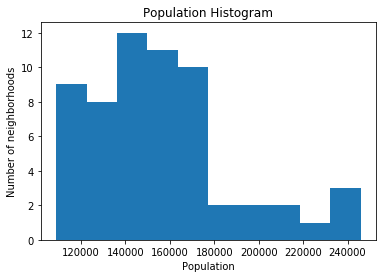

In [26]:
# POPULATION HISTOGRAM
plt.title('Population Histogram')
plt.xlabel('Population')
plt.ylabel('Number of neighborhoods')

plt.hist(df['population'])

## PCA

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

In [97]:
# Remove string columns
df_pca = df.drop(['neighborhood'], axis=1)

In [98]:
# Standardize Data
data = df_pca.values

scaler = StandardScaler()
data = scaler.fit_transform(data)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


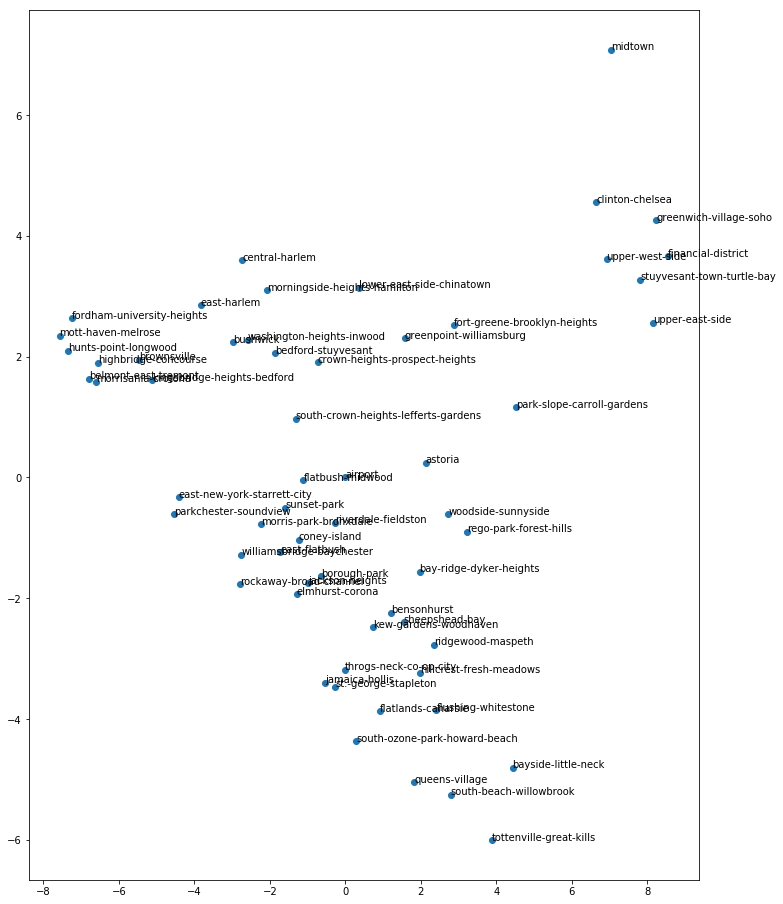

In [104]:
# Visualize 2-D PCA
def plot_points(X, labels):
    plt.figure(figsize=(12,16))
    plt.scatter(X[:,0],X[:,1])
    for i, txt in enumerate(labels):
            plt.annotate(txt, (X[i,0],X[i,1]))
    plt.show()
        
# plot PCA                                                                                                                       
pca = PCA(n_components=2)
pca.fit(data)
X_PCA = pca.transform(data)
plot_points(X_PCA,labels)

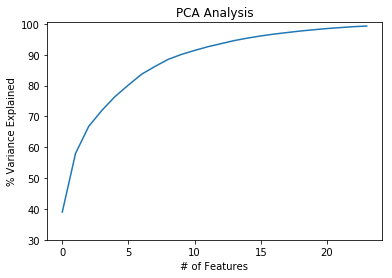

In [66]:
# Compute principal components
covar_matrix = PCA(n_components = 24)
covar_matrix.fit(data)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios                                         

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [85]:
# Try PCA with known-correlated variables (Sanity test)
data_corr = df_pca[['bachelor_higher', 'gross_rent_adj', 'medhhincome_adj', 'medhhincome_rent_adj',\
                          'park_share', 'povrate', 'prof_pct_math', 'prof_pct_ela', 'pwhite']]
data_corr = data_corr.values
scaler = StandardScaler()
data_corr = scaler.fit_transform(data_corr)

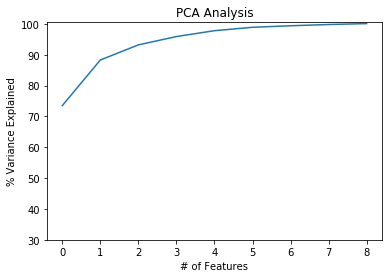

In [86]:
# Compute principal components
covar_matrix = PCA(n_components = 9)
covar_matrix.fit(data_corr)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios                                         

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

## Clustering

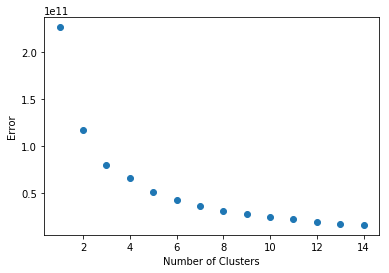

In [158]:
# Elbow method
max_cluster = 15
error = np.zeros((1,15))
x_pts = np.zeros((1,15))
for i in range(1,max_cluster):
    data = df_pca.values
    km = KMeans(n_clusters=i)
    km.fit(data)
    x_pts[0,i] = i
    error[0,i] = km.inertia_
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.scatter(x_pts[0,1:], error[0,1:])

In [159]:
# K-means
data = df_pca.values
km = KMeans(n_clusters=5)
km.fit(data)
print(km.labels_)
for i in range(5):
        print(labels[km.labels_==i])

[3 0 0 3 3 3 3 0 0 3 4 0 0 3 0 3 3 2 3 1 1 3 4 3 2 3 3 3 3 1 3 3 3 4 0 0 3
 3 4 3 1 0 1 0 0 3 0 0 0 3 4 3 0 3 2 2 1 3 0 3]
['bay-ridge-dyker-heights' 'bayside-little-neck' 'brownsville' 'bushwick'
 'coney-island' 'crown-heights-prospect-heights' 'east-harlem'
 'morningside-heights-hamilton' 'morris-park-bronxdale'
 'rego-park-forest-hills' 'riverdale-fieldston' 'rockaway-broad-channel'
 'south-beach-willowbrook' 'south-crown-heights-lefferts-gardens'
 'south-ozone-park-howard-beach' 'throgs-neck-co-op-city'
 'woodside-sunnyside']
['flatlands-canarsie' 'flushing-whitestone' 'jamaica-hollis'
 'queens-village' 'ridgewood-maspeth' 'washington-heights-inwood']
['financial-district' 'greenwich-village-soho' 'upper-east-side'
 'upper-west-side']
['astoria' 'bedford-stuyvesant' 'belmont-east-tremont' 'bensonhurst'
 'borough-park' 'central-harlem' 'east-flatbush'
 'east-new-york-starrett-city' 'elmhurst-corona' 'flatbush-midwood'
 'fordham-university-heights' 'greenpoint-williamsburg'
 'highbri

## Hierarchical Clustering

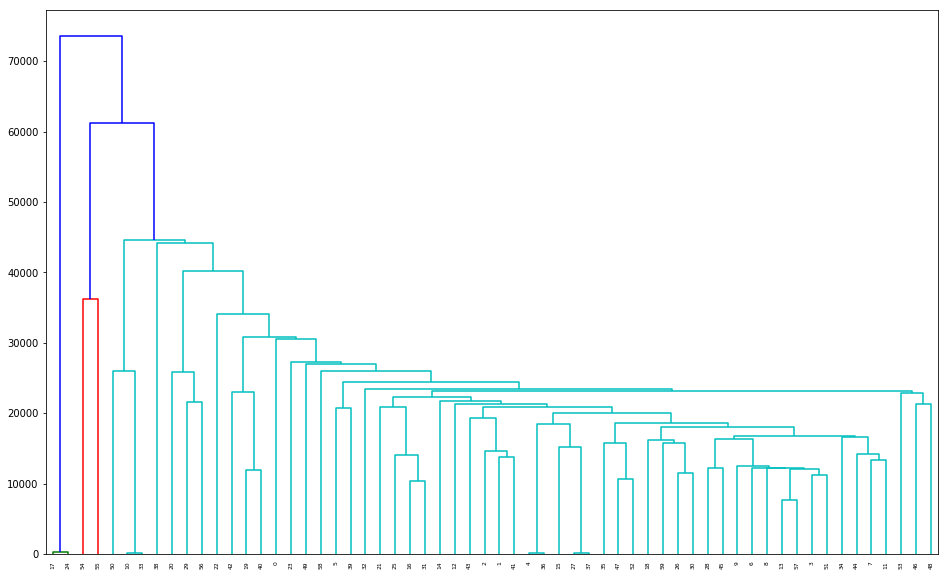

In [151]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

data = df_pca.values
Z = hierarchy.linkage(pdist(data), 'single')
plt.figure(figsize=(16,10))
dn = hierarchy.dendrogram(Z)

In [157]:
for i in range(labels.shape[0]):
    print (i, labels[i])

0 astoria
1 bay-ridge-dyker-heights
2 bayside-little-neck
3 bedford-stuyvesant
4 belmont-east-tremont
5 bensonhurst
6 borough-park
7 brownsville
8 bushwick
9 central-harlem
10 clinton-chelsea
11 coney-island
12 crown-heights-prospect-heights
13 east-flatbush
14 east-harlem
15 east-new-york-starrett-city
16 elmhurst-corona
17 financial-district
18 flatbush-midwood
19 flatlands-canarsie
20 flushing-whitestone
21 fordham-university-heights
22 fort-greene-brooklyn-heights
23 greenpoint-williamsburg
24 greenwich-village-soho
25 highbridge-concourse
26 hillcrest-fresh-meadows
27 hunts-point-longwood
28 jackson-heights
29 jamaica-hollis
30 kew-gardens-woodhaven
31 kingsbridge-heights-bedford
32 lower-east-side-chinatown
33 midtown
34 morningside-heights-hamilton
35 morris-park-bronxdale
36 morrisania-crotona
37 mott-haven-melrose
38 park-slope-carroll-gardens
39 parkchester-soundview
40 queens-village
41 rego-park-forest-hills
42 ridgewood-maspeth
43 riverdale-fieldston
44 rockaway-broad-chan